In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#**1.** **Load** **Packages** and Data

**packages**

In [0]:
#importing packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

**data**

In [0]:
#Load data as Pandas dataframe
train = pd.read_csv('/content/drive/My Drive/Unsupervised Machine Learning/training.csv')
test = pd.read_csv('/content/drive/My Drive/Unsupervised Machine Learning/test.csv')


**combine data**

In [0]:
df = pd.concat([train, test], axis=0, sort=True)

**Checking the Fraudulent and Non Fraudulent Transaction**

Text(0.5, 0, 'FraudResult (0:Non-Fraudulent, 1:Fraudulent)')

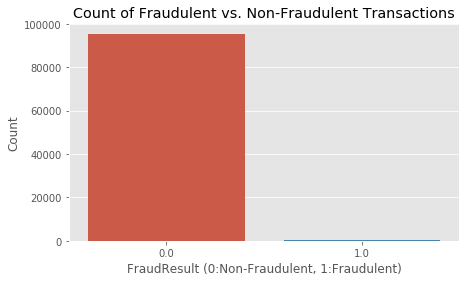

In [0]:

val_count = df.FraudResult.value_counts()
nonfraud = val_count[0]
fraudulent = val_count[1]

plt.figure(figsize=(7,4))
sns.barplot(x=val_count.index, y=val_count)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('FraudResult (0:Non-Fraudulent, 1:Fraudulent)')

**Encoding non numerical to numerical**

In [0]:
#Using Label Encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['AccountId'] = le.fit_transform(df.AccountId.values)
df['BatchId'] = le.fit_transform(df.BatchId.values)
df['ChannelId'] = le.fit_transform(df.ChannelId.values)
df['CountryCode'] = le.fit_transform(df.CountryCode.values)
df['CustomerId'] = le.fit_transform(df.CustomerId.values)
df['PricingStrategy'] = le.fit_transform(df.PricingStrategy.values)
df['ProductId'] = le.fit_transform(df.ProductId.values)
df['ProviderId'] = le.fit_transform(df.ProviderId.values)
df['SubscriptionId'] = le.fit_transform(df.SubscriptionId.values)
df['CurrencyCode'] = le.fit_transform(df.CurrencyCode.values)
df['ProductCategory'] = le.fit_transform(df.ProductCategory.values)
df['TransactionId'] = le.fit_transform(df.TransactionId.values)

In [0]:
df.head()

,AccountId,Amount,BatchId,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,SubscriptionId,TransactionId,TransactionStartTime,Value
0,3286,1000.0,68522,2,0,0,3786,0.0,2,0,1,5,4711,114984,2018-11-15T02:18:49Z,1000
1,4269,-20.0,45765,1,0,0,3786,0.0,2,2,23,3,3144,111539,2018-11-15T02:19:08Z,20
2,3589,500.0,88319,2,0,0,4093,0.0,2,0,0,5,1357,58688,2018-11-15T02:44:21Z,500
3,4451,20000.0,2629,2,0,0,7466,0.0,2,9,13,0,1318,71794,2018-11-15T03:32:55Z,21800
4,4269,-644.0,71473,1,0,0,7466,0.0,2,2,23,3,3144,60900,2018-11-15T03:34:21Z,644


**Convert TransactionStartTime to normal time and date**

In [0]:
df.TransactionStartTime = pd.to_datetime(df.TransactionStartTime)

In [0]:
df.head()

,AccountId,Amount,BatchId,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,SubscriptionId,TransactionId,TransactionStartTime,Value
0,3286,1000.0,68522,2,0,0,3786,0.0,2,0,1,5,4711,114984,2018-11-15 02:18:49+00:00,1000
1,4269,-20.0,45765,1,0,0,3786,0.0,2,2,23,3,3144,111539,2018-11-15 02:19:08+00:00,20
2,3589,500.0,88319,2,0,0,4093,0.0,2,0,0,5,1357,58688,2018-11-15 02:44:21+00:00,500
3,4451,20000.0,2629,2,0,0,7466,0.0,2,9,13,0,1318,71794,2018-11-15 03:32:55+00:00,21800
4,4269,-644.0,71473,1,0,0,7466,0.0,2,2,23,3,3144,60900,2018-11-15 03:34:21+00:00,644


In [0]:
df.shape

(140681, 16)

**Drop CountryCode,CurrencyCode and TransactionStartTime columns**





In [0]:
df.head()

,AccountId,Amount,BatchId,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,SubscriptionId,TransactionId,TransactionStartTime,Value
0,3286,1000.0,68522,2,0,0,3786,0.0,2,0,1,5,4711,114984,2018-11-15 02:18:49+00:00,1000
1,4269,-20.0,45765,1,0,0,3786,0.0,2,2,23,3,3144,111539,2018-11-15 02:19:08+00:00,20
2,3589,500.0,88319,2,0,0,4093,0.0,2,0,0,5,1357,58688,2018-11-15 02:44:21+00:00,500
3,4451,20000.0,2629,2,0,0,7466,0.0,2,9,13,0,1318,71794,2018-11-15 03:32:55+00:00,21800
4,4269,-644.0,71473,1,0,0,7466,0.0,2,2,23,3,3144,60900,2018-11-15 03:34:21+00:00,644


In [0]:
#CountryCode and CurrencyCode has the same values throughout 
#Cannot convert time to a float
df.drop(['TransactionStartTime','AccountId','BatchId','TransactionId','Value','SubscriptionId'], axis=1, inplace=True)

In [0]:
#Check the corrolation
corr = df.corr()
corr

,Amount,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId
Amount,1.000000,0.035237,NaN,NaN,-0.014168,0.557370,-0.079458,0.034813,-0.056837,-0.041769
ChannelId,0.035237,1.000000,NaN,NaN,-0.117828,0.024972,0.014242,-0.145601,-0.409841,0.265515
CountryCode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,-0.014168,-0.117828,NaN,NaN,1.000000,0.014277,0.209665,-0.069509,-0.014176,-0.032710
FraudResult,0.557370,0.024972,NaN,NaN,0.014277,1.000000,-0.051744,0.027165,-0.037310,-0.051937
PricingStrategy,-0.079458,0.014242,NaN,NaN,0.209665,-0.051744,1.000000,-0.260388,-0.076879,-0.088194
ProductCategory,0.034813,-0.145601,NaN,NaN,-0.069509,0.027165,-0.260388,1.000000,0.156253,-0.257260
ProductId,-0.056837,-0.409841,NaN,NaN,-0.014176,-0.037310,-0.076879,0.156253,1.000000,-0.143021
ProviderId,-0.041769,0.265515,NaN,NaN,-0.032710,-0.051937,-0.088194,-0.257260,-0.143021,1.000000


**Visualize**

Text(0.5, 1.0, 'Heatmap of Correlation')

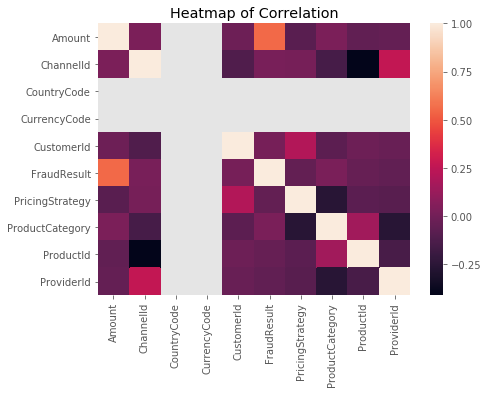

In [0]:
#heatmap
corr = df.corr()
plt.figure(figsize=(7,5))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')


**Reverse back to the origional train data**

In [0]:
train = df[pd.notnull(df['FraudResult'])]
X_test = df[pd.isnull(df['FraudResult'])].drop(['FraudResult'], axis=1)

**Reverse back FraudResults into integers**

In [0]:
train['FraudResult']=train['FraudResult'].apply(int)

In [0]:
X_test.head()

,Amount,ChannelId,CountryCode,CurrencyCode,CustomerId,PricingStrategy,ProductCategory,ProductId,ProviderId
0,1000.0,2,0,0,2064,3,0,20,4
1,2000.0,2,0,0,3194,2,2,6,4
2,-50.0,1,0,0,2064,2,2,23,3
3,3000.0,2,0,0,2341,3,0,1,4
4,-60.0,1,0,0,2341,2,2,23,3


**Split the data**

In [0]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train.drop(['FraudResult'], axis=1),train['FraudResult'],test_size=0.2, random_state=42)

In [0]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_val.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_val.shape)

X_shapes:
 X_train: X_validation:
 (76529, 9) (19133, 9) 

Y_shapes:
 Y_train: Y_validation:
 (76529,) (19133,)


**Load Packages**

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from keras import Sequential
from keras.layers import Dense

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

**Check better performing models**

In [0]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
# models.append(('NEU', Sequential()))
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.940063 (0.036141)
LDA: 0.969873 (0.042131)
KNN: 0.970925 (0.029413)
CART: 0.955599 (0.034352)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

RF: 0.975026 (0.022400)


In [0]:
for i in [X_train, X_val, X_test]:
    print(i.shape)

(76529, 9)
(19133, 9)
(45019, 9)


**Logistic Regression**

In [0]:
model1 = LogisticRegression()

# Train
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

**Random Forest Classifier**

In [0]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Linear Discriminant Analysis**

In [0]:
model3 = LinearDiscriminantAnalysis()
model3.fit(X_train, y_train) 
y_pred3 = model3.predict(X_test)

**K Neighbors Classifier**


In [0]:
model4 =KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train, y_train) 
y_pred4 = model4.predict(X_test) 

**Decision Tree Classifier**

In [0]:
model5 = DecisionTreeClassifier(random_state=0)
model5.fit(X_train, y_train) 
y_pred5 = model5.predict(X_test)

**Neural Networks**

In [0]:
y_pred1.shape

(45019,)

In [0]:
y_pred2.shape

(45019,)

In [0]:
y_pred5.shape

(45019,)

In [0]:
submission = pd.DataFrame()

In [0]:
submission['TransactionId']=test['TransactionId'].values

In [0]:
submission['FraudResult']=y_pred5

In [0]:
submission.shape

(45019, 2)

In [0]:
submission.to_csv('improved.csv', index=False)